# Term0 Week4 授業前課題1 
## コーディング課題：iris classification

## 1. データの取得
irisデータセットを取得後、データフレームから以下を抽出。
- versicolorとvirginica
- sepal_lengthとpetal_length

In [207]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from PIL import Image
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

iris = load_iris()
X = iris.data[50:, [0,2]]
y = iris.target[50:]
y = np.where(y==1, 0, 1) # versicolorとvirginicaのラベルをそれぞれ0と1に振り直す

df = pd.DataFrame(np.hstack((X, y.reshape(-1,1))), columns=iris.feature_names[0:3:2]+["Species"])
df

,sepal length (cm),petal length (cm),Species
0,7.0,4.7,0.0
1,6.4,4.5,0.0
2,6.9,4.9,0.0
3,5.5,4.0,0.0
4,6.5,4.6,0.0
5,5.7,4.5,0.0
6,6.3,4.7,0.0
7,4.9,3.3,0.0
8,6.6,4.6,0.0
9,5.2,3.9,0.0


## 2.  データの分析、データ分割
散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示し、学習用データと検証用データに分割しておく（75:25）。


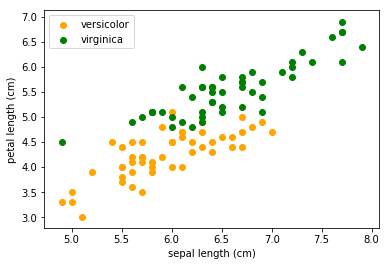

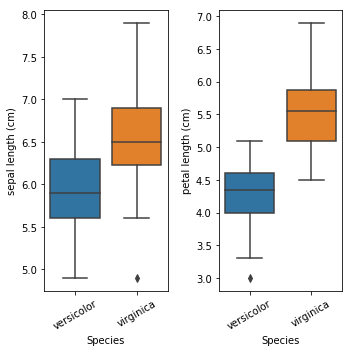

/Users/arimoto/anaconda3/envs/python37/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


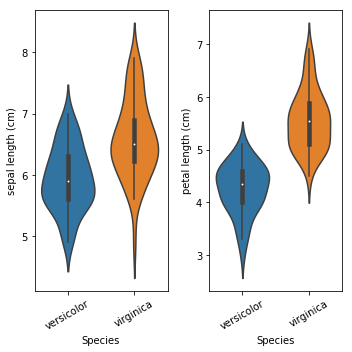

In [208]:
# 散布図
plt.figure()
plt.scatter(X[:50,0], X[:50,1], color="orange", label="versicolor")
plt.scatter(X[50:,0], X[50:,1], color="green", label="virginica")
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.legend(loc="best")
plt.show()

# boxplot
df = pd.DataFrame(np.hstack((X, y.reshape(-1,1))), columns=iris.feature_names[0:3:2]+["Species"])
features = df.columns[:-1]
labels = iris.target_names[1:]
fig, ax = plt.subplots(1,2,figsize=(5,5))
for i, feature in enumerate(features):
    sns.boxplot(x="Species", y=feature, data=df, ax=ax[i])
    ax[i].set_xticklabels(labels, rotation=30)
plt.tight_layout()
plt.show()

# violinplot
fig, ax = plt.subplots(1,2,figsize=(5,5))
for i, feature in enumerate(features):
    sns.violinplot(x="Species", y=feature, data=df, ax=ax[i])
    ax[i].set_xticklabels(labels, rotation=30)
plt.tight_layout()
plt.show()

In [209]:
# データ分割
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=1, stratify=y)

df_train = pd.DataFrame(np.hstack((X_train, y_train.reshape(-1,1))), 
                        columns=["sepal_length (cm)", "petal_length (cm)", "Species"])
print("------訓練データ------")
display(df_train)
df_test = pd.DataFrame(np.hstack((X_test, y_test.reshape(-1,1))), 
                       columns=["sepal_length (cm)", "petal_length (cm)", "Species"])
print("------テストデータ------")
display(df_test)

------訓練データ------


,sepal_length (cm),petal_length (cm),Species
0,7.7,6.1,1.0
1,5.7,5.0,1.0
2,6.0,5.0,1.0
3,6.1,4.9,1.0
4,6.9,5.4,1.0
5,5.7,3.5,0.0
6,6.8,4.8,0.0
7,5.9,4.8,0.0
8,5.4,4.5,0.0
9,5.5,4.0,0.0


------テストデータ------


,sepal_length (cm),petal_length (cm),Species
0,6.4,5.3,1.0
1,5.6,4.5,0.0
2,6.9,5.1,1.0
3,7.7,6.9,1.0
4,5.9,5.1,1.0
5,4.9,3.3,0.0
6,6.3,4.9,1.0
7,6.8,5.5,1.0
8,6.8,5.9,1.0
9,6.0,4.0,0.0


## 3.  標準化
sklearnのStandardScalerで標準化。

In [210]:
sc = StandardScaler()
sc.fit(X_train) # 標準化は訓練データのみで行う
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print("------標準化訓練データの平均値------\n", X_train_std.mean())
print("------標準化訓練データの標準偏差------\n", X_train_std.std())
print("------標準化テストデータの平均値------\n", X_test_std.mean())
print("------標準化テストデータの標準偏差------\n", X_test_std.std())

------標準化訓練データの平均値------
 -1.5691152081368879e-15
------標準化訓練データの標準偏差------
 1.0000000000000002
------標準化テストデータの平均値------
 -0.08101129558660458
------標準化テストデータの標準偏差------
 1.1283074731128204


予測のためのテストデータは使わずに訓練データのみで標準化したため、訓練データの平均値・標準偏差はそれぞれ0, 1となっているが、テストデータはばらついている。

## 4.  学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行う。学習が終わった後、検証用データをpredictメソッドに入力し、推定を行う。
n_neighborsを、デフォルトの5、および1と3を最低限行う。

近傍数k=1の場合のテストデータによる推定結果： 0.84
近傍数k=2の場合のテストデータによる推定結果： 0.84
近傍数k=3の場合のテストデータによる推定結果： 0.92
近傍数k=4の場合のテストデータによる推定結果： 0.88
近傍数k=5の場合のテストデータによる推定結果： 0.92
近傍数k=6の場合のテストデータによる推定結果： 0.92
近傍数k=7の場合のテストデータによる推定結果： 0.92
近傍数k=8の場合のテストデータによる推定結果： 0.88
近傍数k=9の場合のテストデータによる推定結果： 0.96
近傍数k=10の場合のテストデータによる推定結果： 0.96
近傍数k=11の場合のテストデータによる推定結果： 0.96
近傍数k=12の場合のテストデータによる推定結果： 0.96
近傍数k=13の場合のテストデータによる推定結果： 0.96
近傍数k=14の場合のテストデータによる推定結果： 0.92
近傍数k=15の場合のテストデータによる推定結果： 0.96
近傍数k=16の場合のテストデータによる推定結果： 0.92
近傍数k=17の場合のテストデータによる推定結果： 0.92
近傍数k=18の場合のテストデータによる推定結果： 0.92
近傍数k=19の場合のテストデータによる推定結果： 0.92
近傍数k=20の場合のテストデータによる推定結果： 0.92


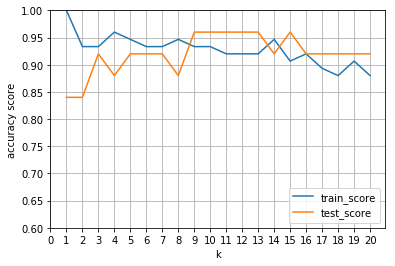

In [211]:
train_score = [] # 訓練リスト
test_score = [] # テストリスト

# k=1から20でfor文
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_std, y_train)
    train_prediction = knn.predict(X_train_std)
    train_score.append(accuracy_score(y_train, train_prediction)) # 訓練スコアを訓練リストに追加
    test_prediction = knn.predict(X_test_std)
    test_score.append(accuracy_score(y_test, test_prediction)) # テストスコアをテストリストに追加
    print("近傍数k="+str(i)+"の場合のテストデータによる推定結果：", accuracy_score(y_test, test_prediction))

# kによる訓練スコアとテストスコアを可視化
plt.figure()
plt.plot(range(1,len(train_score)+1), train_score, label="train_score")
plt.plot(range(1,len(test_score)+1), test_score, label="test_score")
plt.ylim(0,1)
plt.xlabel("k")
plt.xticks(np.arange(0,21,1))
plt.ylabel("accuracy score")
plt.ylim(0.6,1.0)
plt.grid()
plt.legend(loc="lower right")
plt.show()

## 5. 評価
検証用データの特徴量を入力して得られた推定値と、検証用データの正解値の近さを計算し、学習したモデルを評価する。

- sklearnにて、2値分類を評価するための指標値であるaccuracy、precision、recall、f値を計算する。
- 4指標それぞれの意味について簡単に調査してマークダウンでまとめる。
- precision、recall、f値を計算する背景にはTrue Positive(TP)、True Negative(TN)、False Positive(FP)、False Negative(FN)がある。sklearnにて、この4種類を計算するための混同行列を表示させる。

In [212]:
# 4種の指標値の計算
k_array = np.arange(1,21).reshape(-1,1)
test_score = []
names = [
    "k", 
    "test_accuracy_score", 
    "test_precision_score", 
    "test_recall_score", 
    "test_f1_score"]

for k in range(1,21): # k=1から20でfor文
    # 訓練と評価フェーズ
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std, y_train)
    test_prediction = knn.predict(X_test_std)
    # 各スコアをリスト格納
    test_score.append(accuracy_score(y_test, test_prediction))
    test_score.append(precision_score(y_test, test_prediction))
    test_score.append(recall_score(y_test, test_prediction))
    test_score.append(f1_score(y_test, test_prediction))

test_score = np.array(test_score).reshape(-1,4) # 1回のkにつき4種のスコアが1つずつ生成されるので、4列にreshapeして各行がkごとのデータとなる
test_score = pd.DataFrame(np.hstack((k_array, test_score)), 
                          columns=names)
test_score

,k,test_accuracy_score,test_precision_score,test_recall_score,test_f1_score
0,1.0,0.84,1.0,0.692308,0.818182
1,2.0,0.84,1.0,0.692308,0.818182
2,3.0,0.92,1.0,0.846154,0.916667
3,4.0,0.88,1.0,0.769231,0.869565
4,5.0,0.92,1.0,0.846154,0.916667
5,6.0,0.92,1.0,0.846154,0.916667
6,7.0,0.92,1.0,0.846154,0.916667
7,8.0,0.88,1.0,0.769231,0.869565
8,9.0,0.96,1.0,0.923077,0.960000
9,10.0,0.96,1.0,0.923077,0.960000


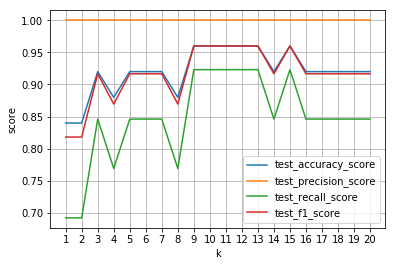

In [213]:
# test_scoreを可視化
for column in test_score.columns[1:]:
    plt.plot(k_array, test_score[column], label=column)
plt.xlabel("k")
plt.xticks(np.arange(1,21))
plt.ylabel("score")
plt.grid()
plt.legend(loc="best")
plt.show()

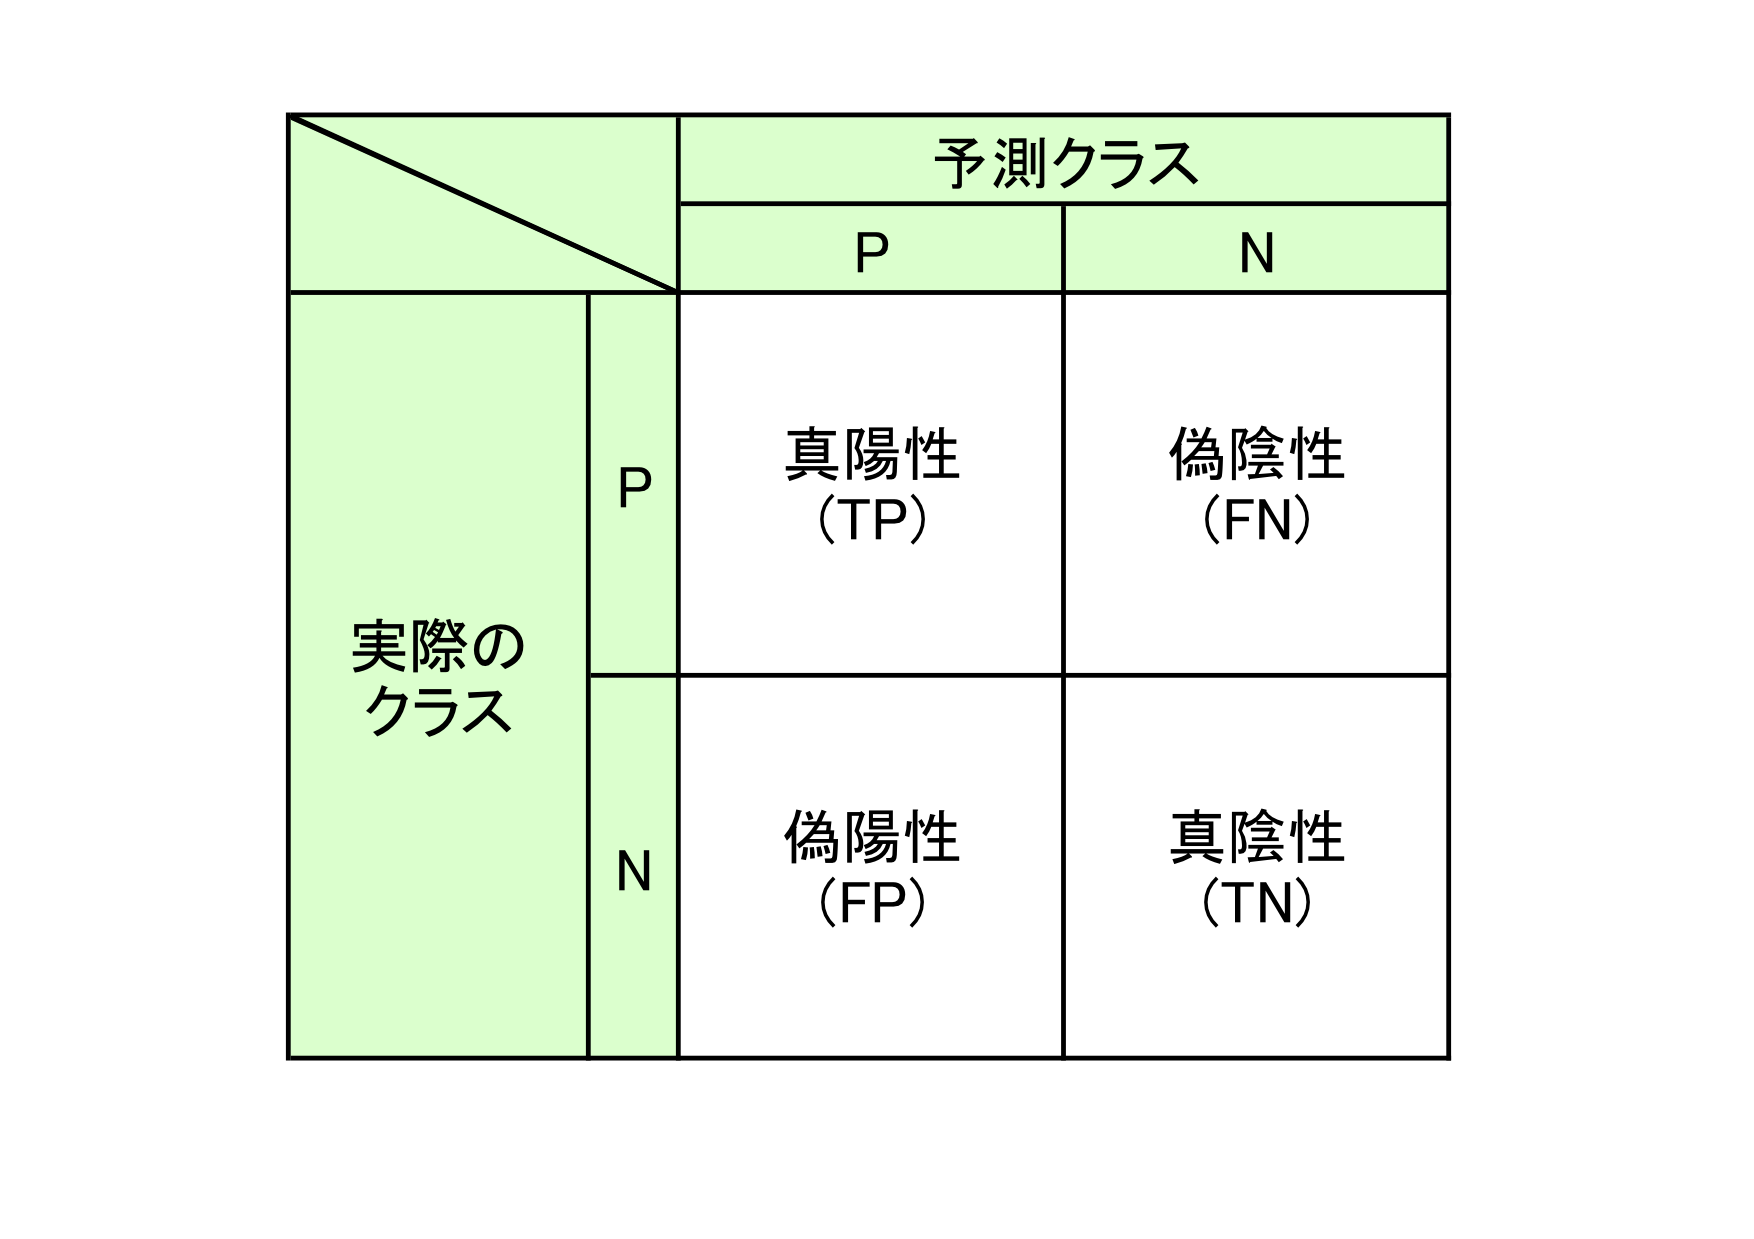

In [214]:
display(Image.open('confusion_matrix.png'))

**------4指標それぞれの意味について------**  
 
**Accuracy**（ACC、正解率、精度とも）は、正確な予測の合計を予測の総数で割ったもの。
$$ACC=\frac{TP+TN}{FP+FN+TP+TN}$$  

**Precision**（PRE、適合率）は、陽性と予測したサンプルのうち、実際に陽性であるものの割合を示す。
$$PRE=\frac{TP}{TP+FP}$$  
**Recall**（REC、再現率）は、真陽性率と同様に、実際に陽性である全サンプルのうち、陽性と予測できたサンプルの割合を示す。
$$REC=\frac{TP}{P}=\frac{TP}{TP+FN}$$  
**f値**（F1スコア）は、適合率と再現率の調和平均として、以下の式で定義される。
$$F1=\frac{2}{1/PRE+1/REC}=2\frac{PRE*REC}{PRE+REC}$$  
故障率、重症率、スパムフィルタ、不正検出など、陽性と陰性間でサンプル数に偏りがある場合、予測クラスを圧倒的に多いどちらかのクラスに全て割り振れば正解率（ACC）は簡単に高値を示す。しかし、実際にはサンプル数が非常に少ないクラスのほうを正確に予測したいケースが多々あり、正解率だけでは正確な予測精度を評価することができない。そこで、以下のように性能指標をケースバイケースで使い分ける必要が出てくる。
- 適合率(PRE)：絶対に確実でなければ陽性と判断したくない場合（例：重要なメールをスパムメールと判断してしまうFPを低くしたい）
- 再現率(REC)：絶対に確実でなければ陰性と判断したくない場合（例：実は悪性腫瘍である患者を見逃してしまうFNを低くしたい）  

適合率(PRE)と再現率(REC)はトレードオフの関係にあるので、両方のバランスを総合的に判断できるF1スコアが実際にはよく用いられる。

k=9の混同行列
 [[12  0]
 [ 1 12]]


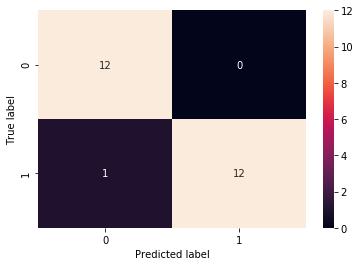

In [215]:
# k=9で混同行列を計算
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_std, y_train)
test_prediction = knn.predict(X_test_std)
conf_mat = confusion_matrix(y_test, test_prediction)
print("k=9の混同行列\n", conf_mat)

# k=9で混同行列を可視化（ラベル0がversicolor、ラベル1がvirginica）
sns.heatmap(conf_mat, annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

## 6. 可視化
今回の2次元特徴量による分類を、決定領域を描く関数を使って散布図で可視化する。この例では学習データをプロットしたことでどのように学習したかを見ることができる。一方で、検証用データをプロットすればどういった特徴量のものが間違って分類されたかを見ることができる。また、両方合わせてプロットすることも可能。

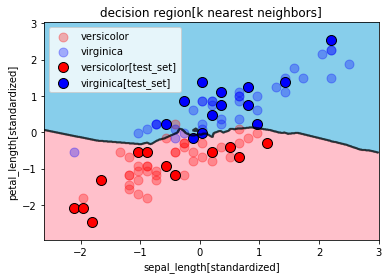

In [216]:
# 訓練データと検証データの両方をプロットする関数を作成
def decision_region(X, y, model, step=0.01, test_idx=None, feature_names=None, target_names=None, model_name=None):
    """
    多値分類（3種まで）を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用・検証用データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        学習用・検証用データの特徴量
    y : ndarray, shape(n_samples,)
        学習用・検証用データの正解値
    model : object
        学習したモデルのインスンタス
    step : float, (default : 0.01)
        推定値を計算する間隔
    test_idx : range of int
        テストデータのindex
    feature_names : list of str
        軸ラベルの一覧
    target_names= : list of str
        凡例の一覧
    model_name : str
        グラフタイトルに組み込むmodel名
    """
    # setting（2値分類の場合は2色、3値分類の場合は3色としておく）
    n_class = np.unique(y).shape[0]
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue', 'lightgreen']
    if n_class<3:
        scatter_color = ['red', 'blue']
        contourf_color = ['pink', 'skyblue']    

    # pred
    x1_min, x1_max = np.min(X[:, 0])-0.5, np.max(X[:, 0])+0.5
    x2_min, x2_max = np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5
    xx1, xx2  = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))
    mesh = np.c_[np.ravel(xx1), np.ravel(xx2)]
    Z = model.predict(mesh).reshape(xx1.shape)

    # train & test plot
    plt.contourf(xx1, xx2, Z, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(xx1, xx2, Z, n_class-1, colors='black', linewidths=2, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], 
                    s=80, color=scatter_color[i], alpha=0.3, label=target_names[i], marker='o')
    plt.title("decision region["+model_name+"]")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    
    # emphasizing test plot only
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        for i, target in enumerate(np.unique(y_test)):
            plt.scatter(X_test[y_test==target][:, 0], X_test[y_test==target][:, 1], 
                        s=100, color=scatter_color[i], edgecolor="black", alpha=1.0, linewidth=1, 
                        label=target_names[i]+"[test_set]", marker="o")
    plt.legend(loc="best")

# 実際にプロット
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
test_idx = range(75,100) # テストデータのインデックスを指定

decision_region(X=X_combined, y=y_combined, model=knn, step=0.01, test_idx=test_idx, 
                feature_names=["sepal_length[standardized]", "petal_length[standardized]"], 
                target_names=['versicolor', 'virginica'], model_name="k nearest neighbors")
plt.show()

## 7. 他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行い、指標値を１つの表にまとめる。その表と決定領域を利用して結果を簡単に考察する。どの手法でどの指標値が良かったかや、どういった決定領域になっていたかを述べる。本来はそれぞれパラメータをチューニングするべきだが、まずはデフォルトで実行する。

- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

### 最近傍法  
4.~ 6.までの学習・推定・評価・可視化の結果の指標値は、5.の「評価」セクションで算出した表および経時変化グラフの通り。  
k近傍法はノンパラメトリックな怠惰学習の典型例。k個の最近傍での多数決によって未知データの分類が決まるという特性から、学習コストがゼロで導入しやすく、モデルが単純なのでどのようなデータでも大体適用可能な強みがある。反面、分類ごとに毎回計算するので評価段階で計算コストがかかり、計算のためのデータを格納しておく必要メモリがデータ量に比例して増加する欠点がある。また、過学習を起こしやすく、過学習と学習不足のバランスをとることも重要。$k\leq2$では訓練データがによる過学習が起きており、$k\geq10$では訓練データの精度低下によりテストデータの予測精度も下がり続けている。適合率はkの値によらず常に最高値の1.0を示していた。再現率とf1スコアが高値を示したk=9にて決定領域の可視化を行った6.の図では、virginica（青）のテストデータが1点だけversicolor領域（ピンク）にはみ出しており、5.の混同行列の結果と合致していることがわかる。

In [217]:
display(test_score)

,k,test_accuracy_score,test_precision_score,test_recall_score,test_f1_score
0,1.0,0.84,1.0,0.692308,0.818182
1,2.0,0.84,1.0,0.692308,0.818182
2,3.0,0.92,1.0,0.846154,0.916667
3,4.0,0.88,1.0,0.769231,0.869565
4,5.0,0.92,1.0,0.846154,0.916667
5,6.0,0.92,1.0,0.846154,0.916667
6,7.0,0.92,1.0,0.846154,0.916667
7,8.0,0.88,1.0,0.769231,0.869565
8,9.0,0.96,1.0,0.923077,0.960000
9,10.0,0.96,1.0,0.923077,0.960000


### 最近傍法以外の手法との比較

/Users/arimoto/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/arimoto/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,train_accuracy,test_accuracy,test_precision,test_recall,test_f1_score
k nearest neighbors,0.93,0.96,1.00,0.92,0.96
Logistic Regression,0.96,0.92,1.00,0.85,0.92
SVM,0.96,0.92,1.00,0.85,0.92
Decision tree,1.00,0.84,0.91,0.77,0.83
Random forest,0.99,0.88,1.00,0.77,0.87


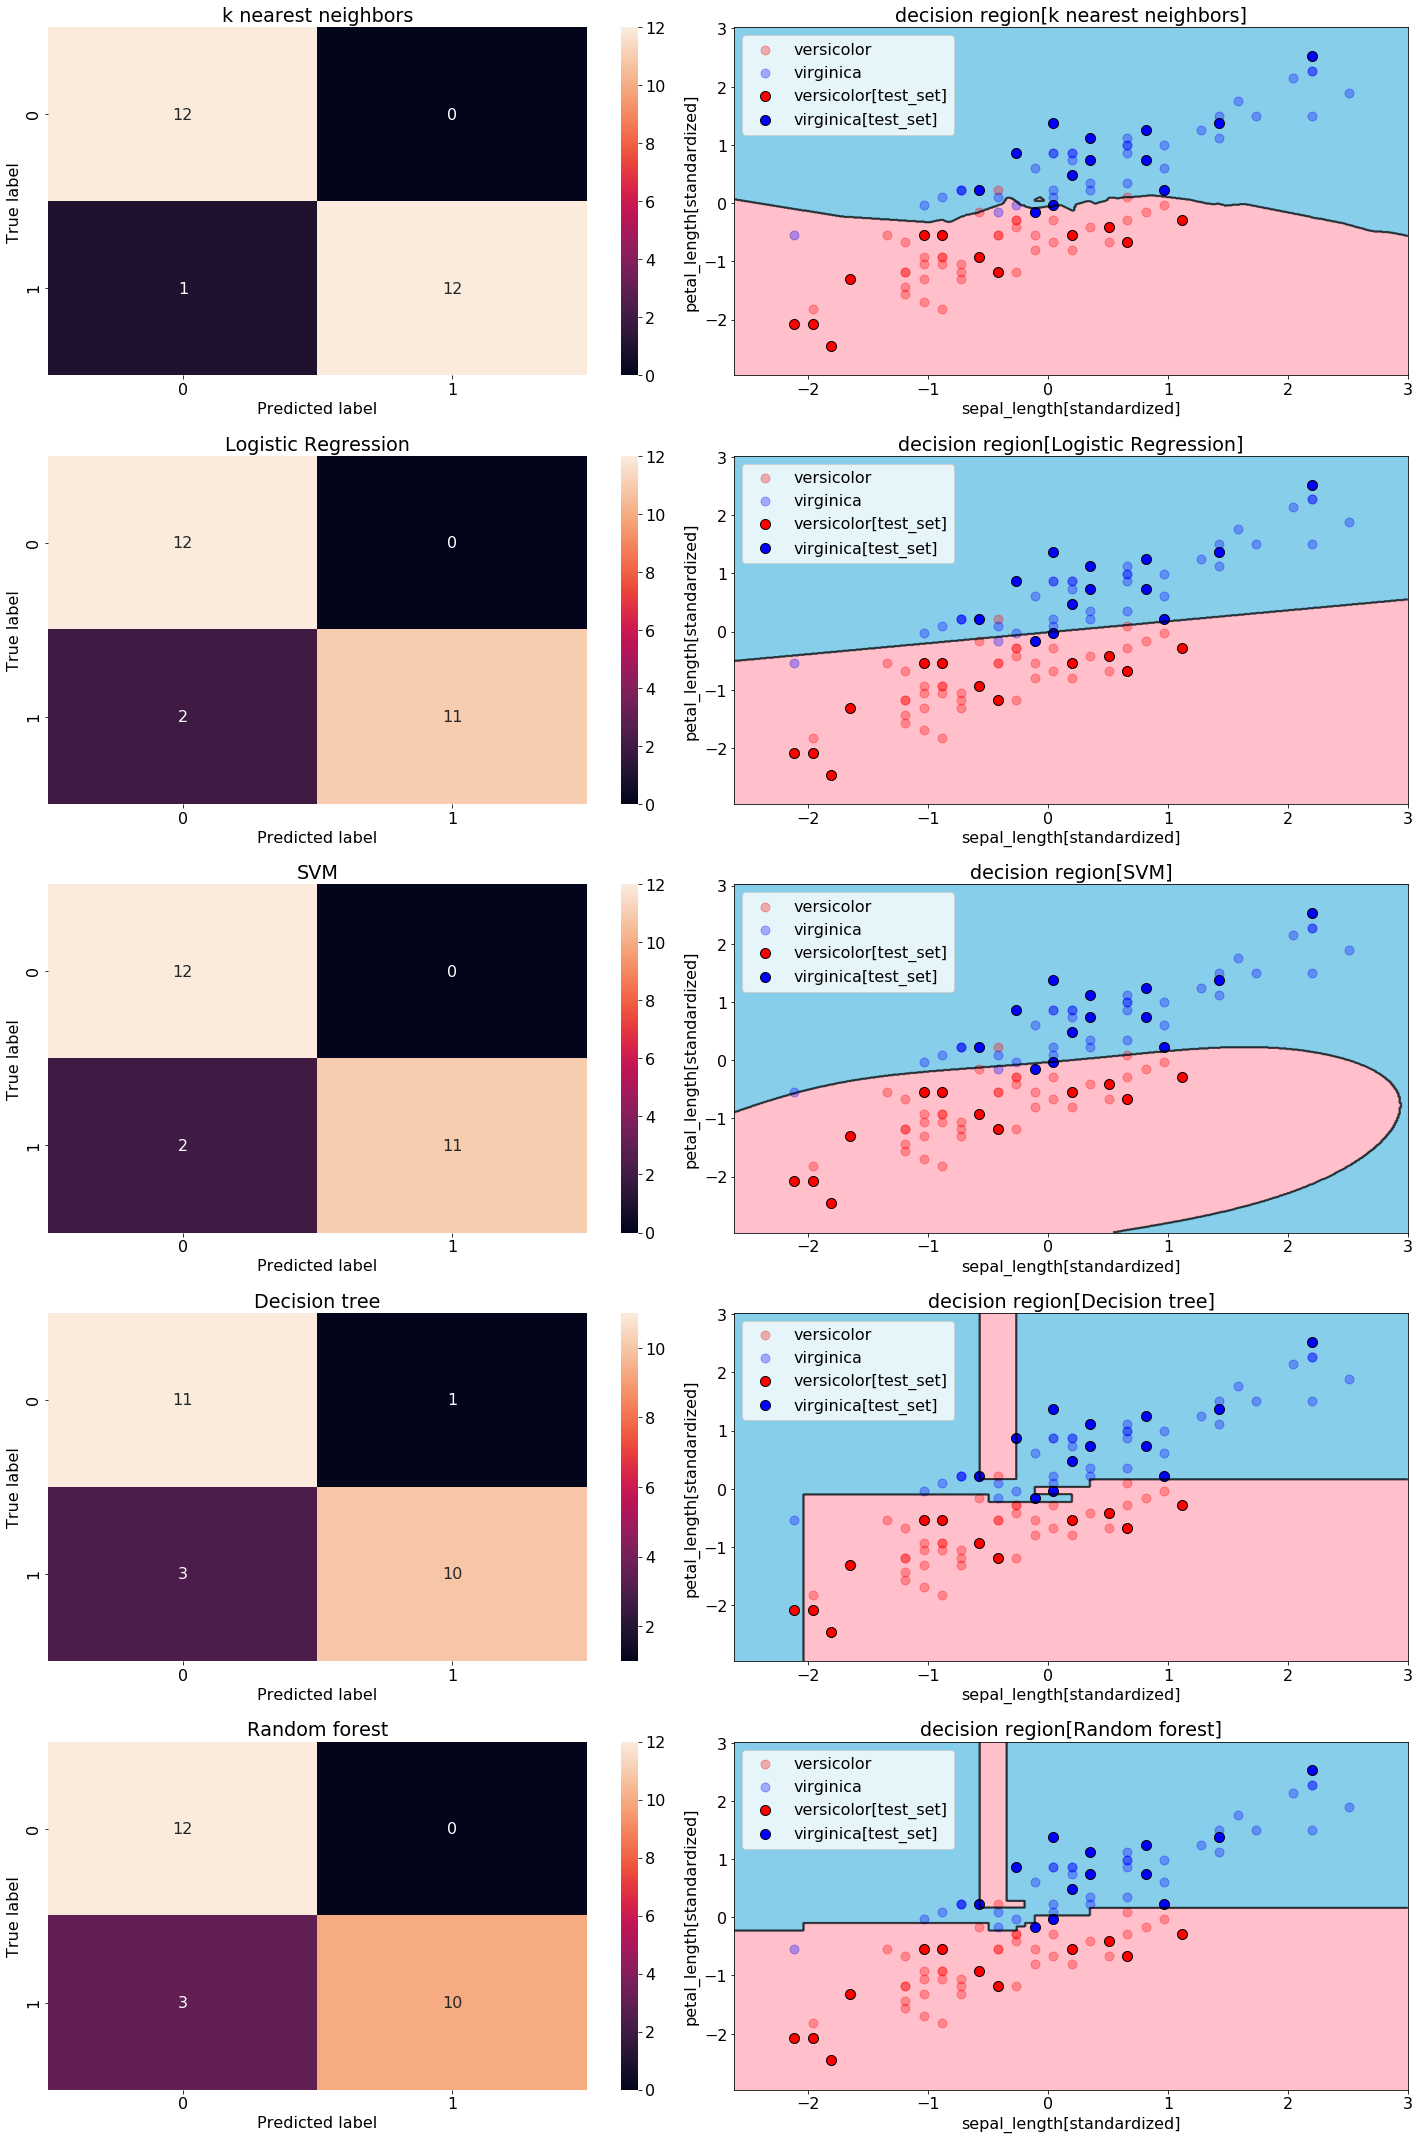

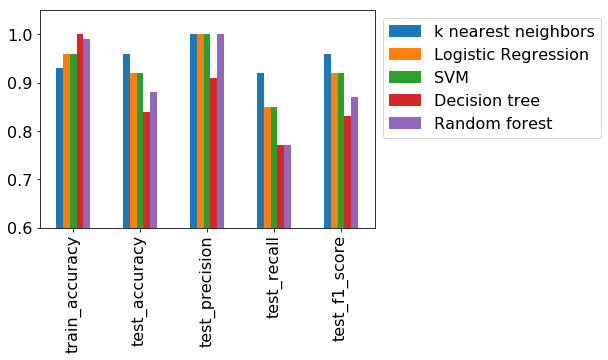

In [218]:
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.linear_model import LogisticRegression as lr
from sklearn.svm import SVC as svc
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc

# 以下5変数を指定し、5種スコアの集計表と混同行列・決定領域の可視化をする関数scoring_funcを作成する
model_names = ["k nearest neighbors", "Logistic Regression", "SVM", "Decision tree", "Random forest"]
models = [knc(n_neighbors=9), 
          lr(random_state=1), svc(random_state=1), dtc(random_state=1), rfc(random_state=1)]
feature_names=["sepal_length[standardized]", "petal_length[standardized]"]
target_names=['versicolor', 'virginica']
test_idx=range(75,100)

def scoring_func(X_train, X_test, y_train, y_test, 
                 model_names, models, feature_names, target_names, test_idx):
    """
    多値分類（3種まで）を2次元の特徴量において複数のモデルで学習し、以下の図表を出力する。
    1. 訓練データの正解率、テストデータの正解率、適合率、再現率、f1スコアの5種の集計表
    2. 混同行列と決定領域を列ごとに、それらをモデル別に行ごとにまとめた図
    3. 1.の集計表の棒グラフ
    なお、決定領域の出力には別途作成したdecision_region関数を利用する。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    X_test : ndarray, shape(n_samples, 2)
        検証用データの特徴量
    y_train : ndarray, shape(m_samples,)
        学習用データの正解値
    y_test : ndarray, shape(m_samples,)
        検証用データの正解値
    model_names : list of str
        グラフタイトルに組み込むmodel名の一覧
    models : list of instances
        学習するモデルのインスンタスの一覧
    feature_names : list of str
        軸ラベルの一覧
    target_names= : list of str
        凡例の一覧
    test_idx : range of int
        テストデータのindex
    """
    score = []
    scoring_names = ["train_accuracy", "test_accuracy", "test_precision", "test_recall", "test_f1_score"]
    plt.figure(figsize=(20,30))
    plt.rcParams["font.size"] = 16
    subplot_iterator = iter(np.arange(1,len(models)*2+1)) # subplotのためのイテレータを作成(今回は5行2列の10要素) 
    # 学習、推定、評価リストを作成し、model毎に混同行列と決定境界を可視化
    for model_name, model in zip(model_names, models):
        # 学習
        model.fit(X_train, y_train)
        # 推定
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        # 評価
        score.append(accuracy_score(y_train, y_train_pred)) # 訓練データの正解率を算出
        score.append(accuracy_score(y_test, y_test_pred)) # テストデータの正解率を算出
        score.append(precision_score(y_test, y_test_pred)) # テストデータの適合率を算出
        score.append(recall_score(y_test, y_test_pred)) # テストデータの再現率を算出
        score.append(f1_score(y_test, y_test_pred)) # テストデータのf1スコアを算出
        # subplotsの1列目に混同行列を可視化（ラベル0がversicolor、ラベル1がvirginica）
        plt.subplot(5,2,next(subplot_iterator))
        conf_mat = confusion_matrix(y_test, y_test_pred)
        sns.heatmap(conf_mat, annot=True)
        plt.title(model_name)
        plt.xlabel("Predicted label")
        plt.ylabel("True label")
        # subplotsの2列目に決定境界を可視化（model変数にはmodelを指定）
        plt.subplot(5,2,next(subplot_iterator))
        X_combined = np.vstack((X_train, X_test))
        y_combined = np.hstack((y_train, y_test))
        decision_region(X=X_combined, y=y_combined, model=model, step=0.01, test_idx=test_idx, 
                        feature_names=feature_names, target_names=target_names, 
                        model_name=model_name)
        plt.tight_layout()
    # 評価したスコアを集計して表示
    score = np.array(score).reshape(-1,5).round(2) # 各列を5種のスコアに変形
    score = pd.DataFrame(score, index=model_names, columns=scoring_names)
    display(score) # スコアのDataFrameを表示
    score.T.plot(kind="bar") # スコア毎に棒グラフを表示
    plt.legend(bbox_to_anchor=(1,1))
    plt.ylim(0.6,1.05)

# 実際に関数を実行して表示
scoring_func(X_train_std, X_test_std, y_train, y_test, 
             model_names, models, feature_names, target_names, test_idx)
plt.show()


**どの手法でどの指標値が良かったか**  
- k近傍法  
train_accuracyとtest_accuracyが同程度で高値。test_precision、test_recall、f1_scoreは他の分類器と比べてもトップクラス。
- ロジスティック回帰、SVM  
正解率が高値だが、再現率(今回は、青の真ラベル1(virginica)が正しく分類される率)が比較的低く出ている。青の真ラベル1(virginica)の2サンプルが誤分類されてしまっている。
- 決定木とランダムフォレスト  
train_accuracyが高く、test_accuracyが低いので、明らかに過学習している。test_recall、f1_scoreも低値を示している。

**どういった決定領域になっていたか**
- k近傍法  
前項まででkの値を大まかに調整していたので、直感的な決定境界に最も近いケースとなっている。
- ロジスティック回帰  
直線の決定境界となっている。
- SVM  
境界に最も近いサンプルとのマージン最大化を目指すモデルであり、決定境界が曲面になっている。
- 決定木、ランダムフォレスト
過学習の結果として複雑な決定領域となっており、領域の突出部や飛び地も出現している。  
そのため、テストデータにて誤分類が頻発し、再現率が最低レベルとなっている。

## 8. （アドバンス課題）各パラメータの意味
手法のパラメータはデフォルトとしたが、実際に利用する上ではデフォルトは必ずしも良い設定ではない。それぞれの意味を調査した上で複数の設定を試し、その結果を報告する。

**k nearest neighbors**  
- minkowski:  
近傍の点を測る距離において、ユークリッド距離とマンハッタン距離を一般化したものであり、点$x^{(i)}$と$x^{(j)}$との距離を以下の式で定義する。
$$d(x^{(i)},x^{(j)})=\sqrt[p]{\sum_{k}{|{x_k}^{(i)}-{x_k}^{(j)}|}^p}$$
- p:  
上式において、p=2はユークリッド距離、p=1はマンハッタン距離となる。

**Logistic Regression**  
- L2 & L1正則化:  
　ロジスティックシグモイド関数は、$$\phi(z)=\frac{1}{1+e^{-z}}$$で定義される。  
　予測ラベルを$\hat{y}$とすると、二値分類においては、予測された確率を以下のような成果指標に変換してラベルを予測することとなる。
$$
\text{$\hat{y}=$}
\begin{cases}
  \text{1 $(\phi(z)\geq0.5)$} \\
  \text{0 $(\phi(z)\leq0.5)$}
\end{cases}
$$
　特徴量$x$を重み$w$でパラメータ化した結果、あるサンプル$i$の予測確率を$\phi(z^{(i)})$、サンプル$i$の実際のラベルを$y^{(i)}$とする。最尤法における対数尤度関数の定義から、対数尤度関数は以下のように定義できる。
$$L(w)=\sum_{i}[y^{(i)}log(\phi(z^{(i)}))+(1-y^{(i)})log(1-\phi(z^{(i)}))]$$
　コスト関数$J(w)$は、この対数尤度関数のマイナスをとったものにおいて最小値を目指すことにより、文字通りコストの最小化を図ることで最適な予測を可能とする。
$$J(w)=-L(w)=\sum_{i}[-y^{(i)}log(\phi(z^{(i)}))-(1-y^{(i)})log(1-\phi(z^{(i)}))]$$
　正則化は、week3の課題でも記述したように、多重共線性を処理するための簡便な方法であり、データから余計な特徴量による影響を防いで過学習を回避する。  
　L2正則化（Ridge回帰とも）は、上記のコスト関数$J(w)$にL2正則化項を加え、以下の式で定義される。
$$J_{L2}(w)=J(w)+\frac{\lambda}{2}||w||^2$$
$$||w||=\sqrt{\sum_{i}{w_i}^2}$$
　$\lambda$は正則化パラメータと呼ばれ、ハイパーパラメータ（実際には下記のCパラメータ）として初期値設定する必要がある。  
　L1正則化（Lasso回帰とも）は、以下の式で定義される。
$$J_{L1}(w)=J(w)+\lambda|w|_1$$
$$|w|_1=\sum_{i}|w_i|$$
　L1正則化は疎な解を求め、いくつかの係数が完全に0となる。モデルにおいて一部の特徴量が完全に無視され、自動的に特徴量を選択していると考えてもよい。
- C:  
上記の正則化パラメータ$\lambda$に直接関連しており、その逆数をとる。
$$C=\frac{1}{\lambda}$$
Cが小さい場合は制限されたモデルに対応し、個々のデータポイントの与える影響は小さくなる。Cが大きい場合は、個々のデータポイントがそれぞれ強い影響を持つことになり、正しくクラス分類されるように決定境界を曲げ、時には過学習の恐れも出てくる。

**SVM**  
- kernel:  
　線形分離が難しいデータ群においては、射影関数$\phi$を使って訓練データを高次元空間に変換し、この新しい特徴空間でデータ分類するためのモデルを訓練する。データ次元を高めることで、超平面を使って分割できるようになる。これを元の特徴空間に逆射影することで非線形の決定境界を生成することができる。高次元空間への射影時には計算コストがかかり、これを回避する手法としてカーネルトリックが存在する。パラメータkernelにて射影関数$\phi$（高次元空間へのマップ方法）を指定するが、SVMで最も広く使用されているカーネルの一つが放射基底関数（rbf: radial basis function）となる。データポイント間の距離は次式のようにガウシアンカーネルで測られる。
 $$k_{rbf}(x^{(i)},x^{(j)})=exp(-\gamma||x^{(i)}-x^{(j)}||^2)$$
 $$\gamma=\frac{1}{2\sigma^2}$$
 2つのサンプル間の類似性を表す関数であり、上式の距離計算において発生するベクトルの内積$x^{(i)T}x^{(j)}$を$\phi(x^{(i)})^T\phi(x^{(j)})$に置き換えることで計算コストを回避する。
 
- gamma:  
　gammaは上式のガウシアンカーネルの幅を調整するパラメータのこと。gammaが小さいと、ガウシアンカーネルの幅が大きくなり、多くの点を近いと判断する。これにより決定境界は滑らかになる。gammaが大きいと、多くの点を遠いと判断し、個々のデータポイントをより重視するような、狭く複雑な決定領域になる。この場合は当然モデルもより複雑になる。

**Decisiontree & Random forest**  
- criterion:  
　二分決定木の目的関数は、分割ごとに情報利得(IG: Information Gain)が最大となるように定式化され、以下のように定義される。
$$IG(D_p,f)=I(D_p)-\frac{N_{left}}{N_p}I(D_{left})-\frac{N_{right}}{N_p}I(D_{right})$$
　$f$は分割を行う特徴量、$D_p$は親ノードのデータセット、$D_{left}$と$D_{right}$は子ノードのデータセット、$N$は個々のノードのサンプル数を表している。情報利得は親ノードの不純度$I$と子ノードの不純度$I$の合計との差を表している。この不純度の指標には、ジニ不純度$I_G$(Gini Impurity)、エントロピー$I_H$(entropy)、分類誤差$I_E$(classification error)の3つがあり、以下の式で定義される。
$$I_H(t)=-\sum_{i}p(i|t)log_2p(i|t)$$
$$I_G(t)=1-\sum_{i}p(i|t)^2$$
$$I_E(t)=1-max\{p(i|t)\}$$
$p(i|t)$は、特定のノード$t$においてクラス$i$に属するサンプルの割合を示す。サンプル割合を変えた場合の各不純度の推移はそれぞれに違いはあるものの、各不純度は全て、対象ノードのサンプルが全て同じクラスに属する場合に最小、各クラスが一様に（均等に）分布している場合に最大となる。

- max_depth:  
決定木の深さを設定する。深くなるほど決定境界は複雑になり、過学習に陥りやすくなるので注意が必要。

**Random forest**  
- n_estimators:  
ランダムフォレストは決定木のアンサンブルと理解することができる。毎回の決定木成長の際に一部の特徴量をランダムに非復元抽出し、複数の決定木を平均化することで汎化性能を高めようとする。n_estimatorsは決定木の数を設定する。


/Users/arimoto/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,train_accuracy,test_accuracy,test_precision,test_recall,test_f1_score
k nearest neighbors,0.92,0.96,1.00,0.92,0.96
Logistic Regression,0.96,0.92,1.00,0.85,0.92
SVM,0.96,0.92,1.00,0.85,0.92
Decision tree,0.97,0.92,0.92,0.92,0.92
Random forest,0.97,0.92,1.00,0.85,0.92


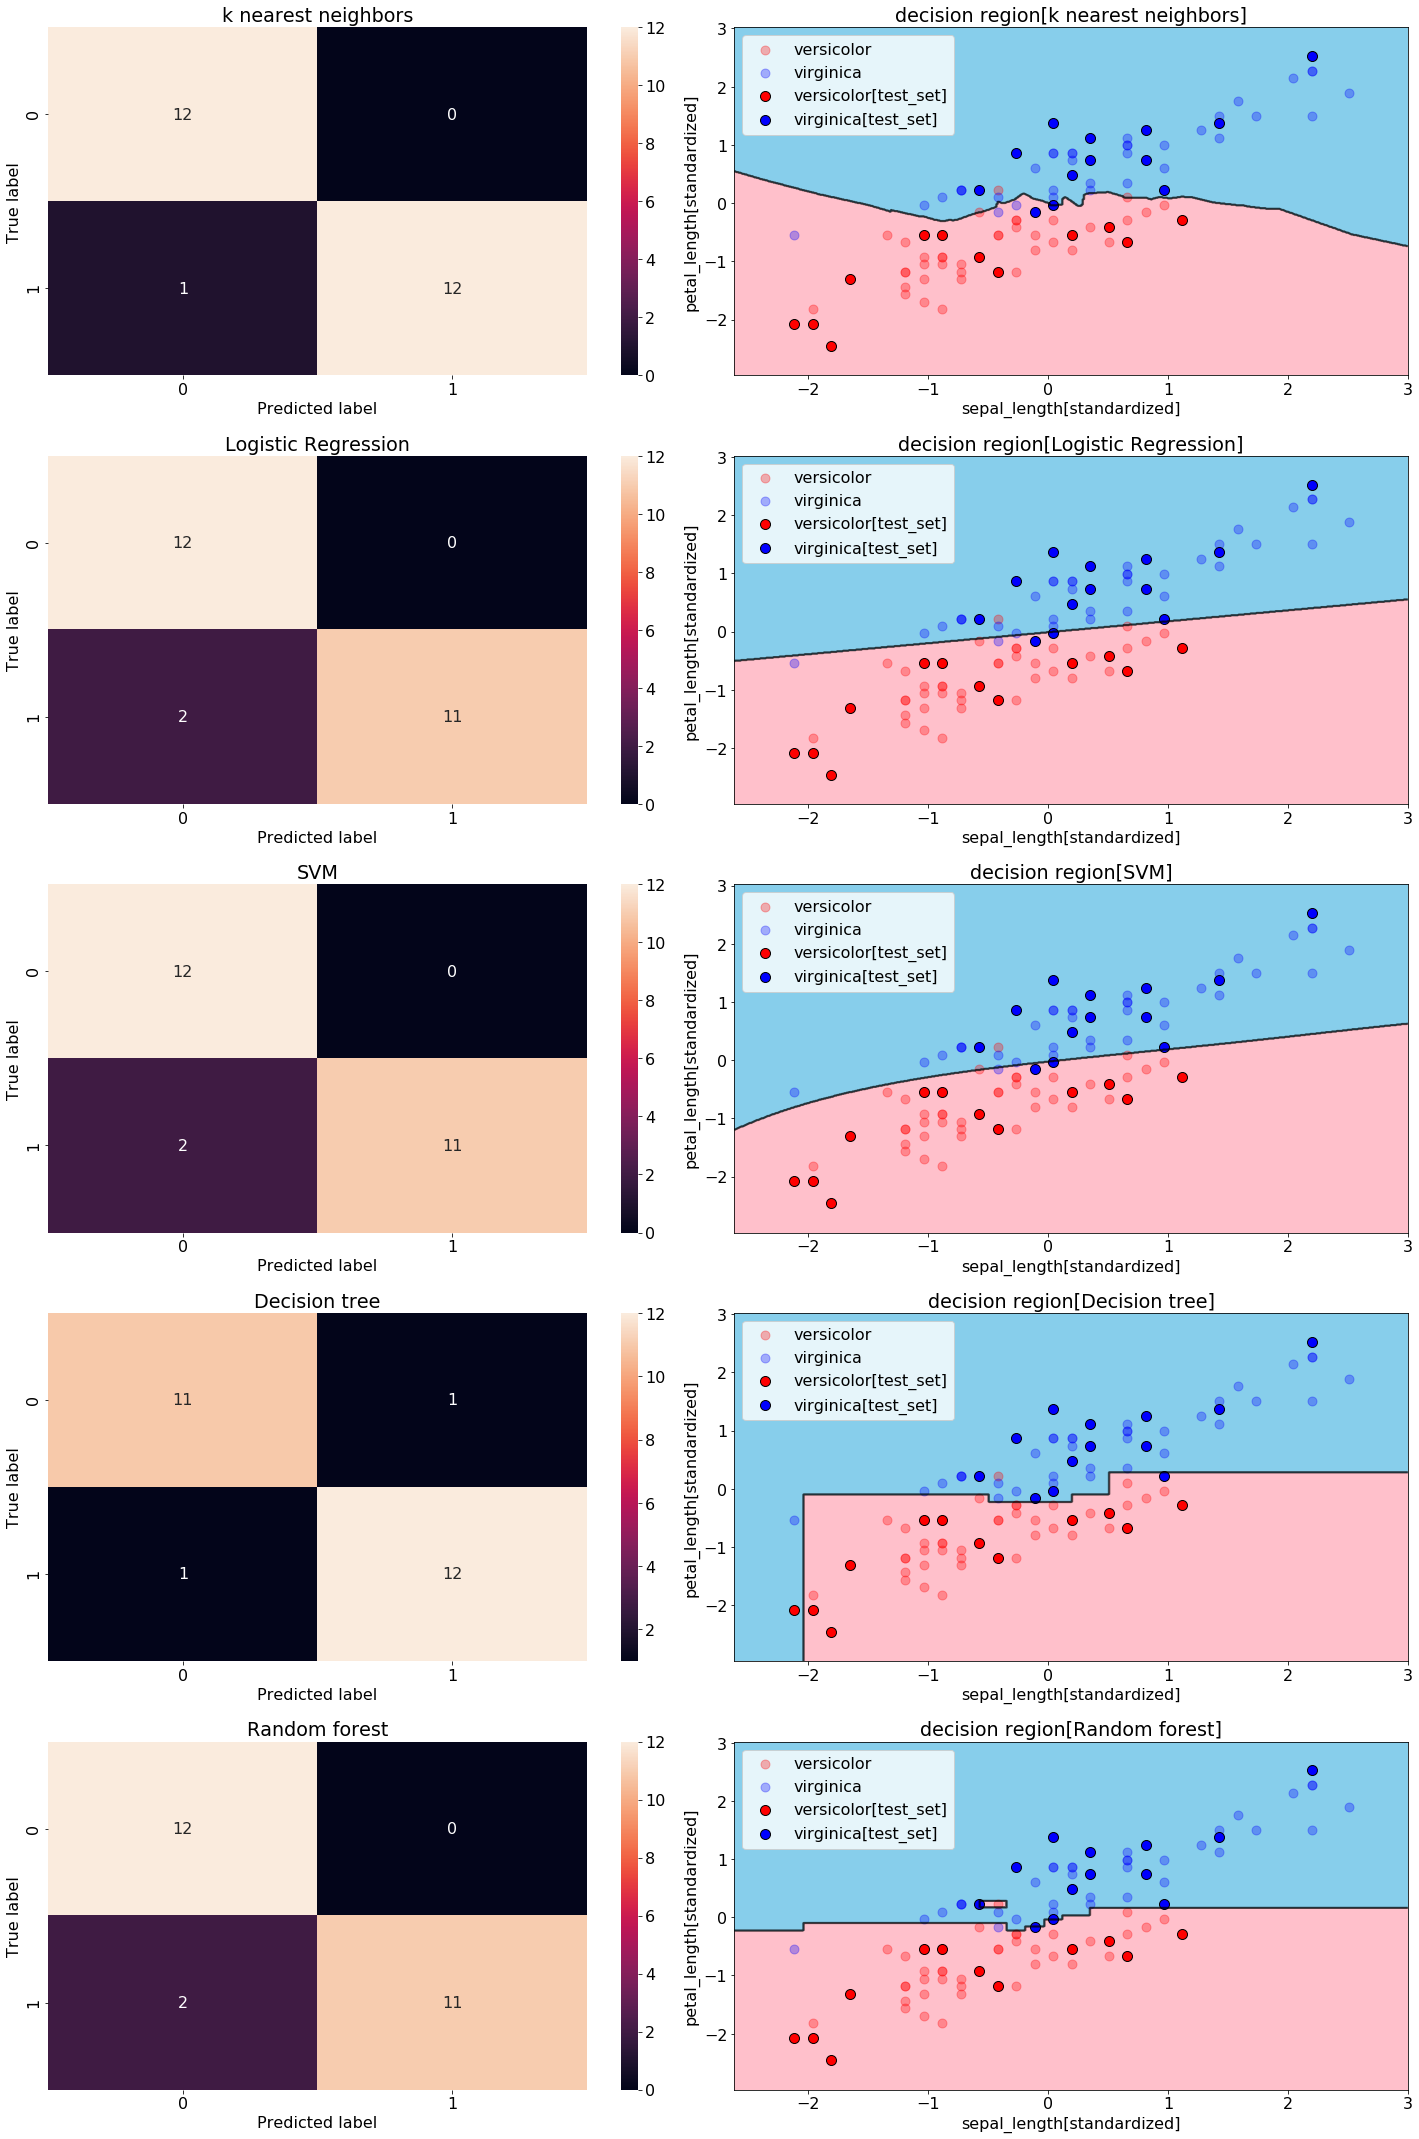

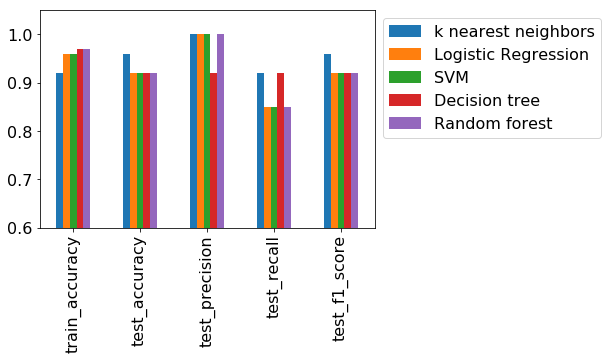

In [219]:
# 前項と比べ、modelsのパラメータ値を調整する
model_names = ["k nearest neighbors", "Logistic Regression", "SVM", "Decision tree", "Random forest"]
models = [knc(n_neighbors=12, p=2, metric="minkowski"), 
          lr(penalty="l2", C=1, random_state=1), 
          svc(C=10, kernel="rbf", gamma=0.1, random_state=1), 
          dtc(criterion="entropy", max_depth=5, random_state=1), 
          rfc(criterion="gini", max_depth=5, random_state=1, n_estimators=10)]
feature_names=["sepal_length[standardized]", "petal_length[standardized]"]
target_names=['versicolor', 'virginica']
test_idx=range(75,100)

# 実際に関数実行
scoring_func(X_train_std, X_test_std, y_train, y_test, 
             model_names, models, feature_names, target_names, test_idx)
plt.show()

**結果**  
グリッドサーチを利用した最適なパラメータ探索をしていないが、手動でパラメータを変化させることで、前項と比較し、各分類器とも精度が同程度または向上していることがわかる。SVM、決定木、ランダムフォレストの決定境界が大幅に改善している。

## 9. （アドバンス課題）標準化の有無の比較
前処理として標準化を行ったが、これを行わなかった場合どのような結果が得られるか。各手法に対しての指標値の表と決定領域の図を作成し、比較および考察を行う。考察には標準化が機械学習の前処理としてどのような意味があるかを絡める。

/Users/arimoto/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,train_accuracy,test_accuracy,test_precision,test_recall,test_f1_score
k nearest neighbors,0.92,0.96,1.00,0.92,0.96
Logistic Regression,0.93,0.84,0.91,0.77,0.83
SVM,0.97,0.92,1.00,0.85,0.92
Decision tree,0.97,0.92,0.92,0.92,0.92
Random forest,0.97,0.96,1.00,0.92,0.96


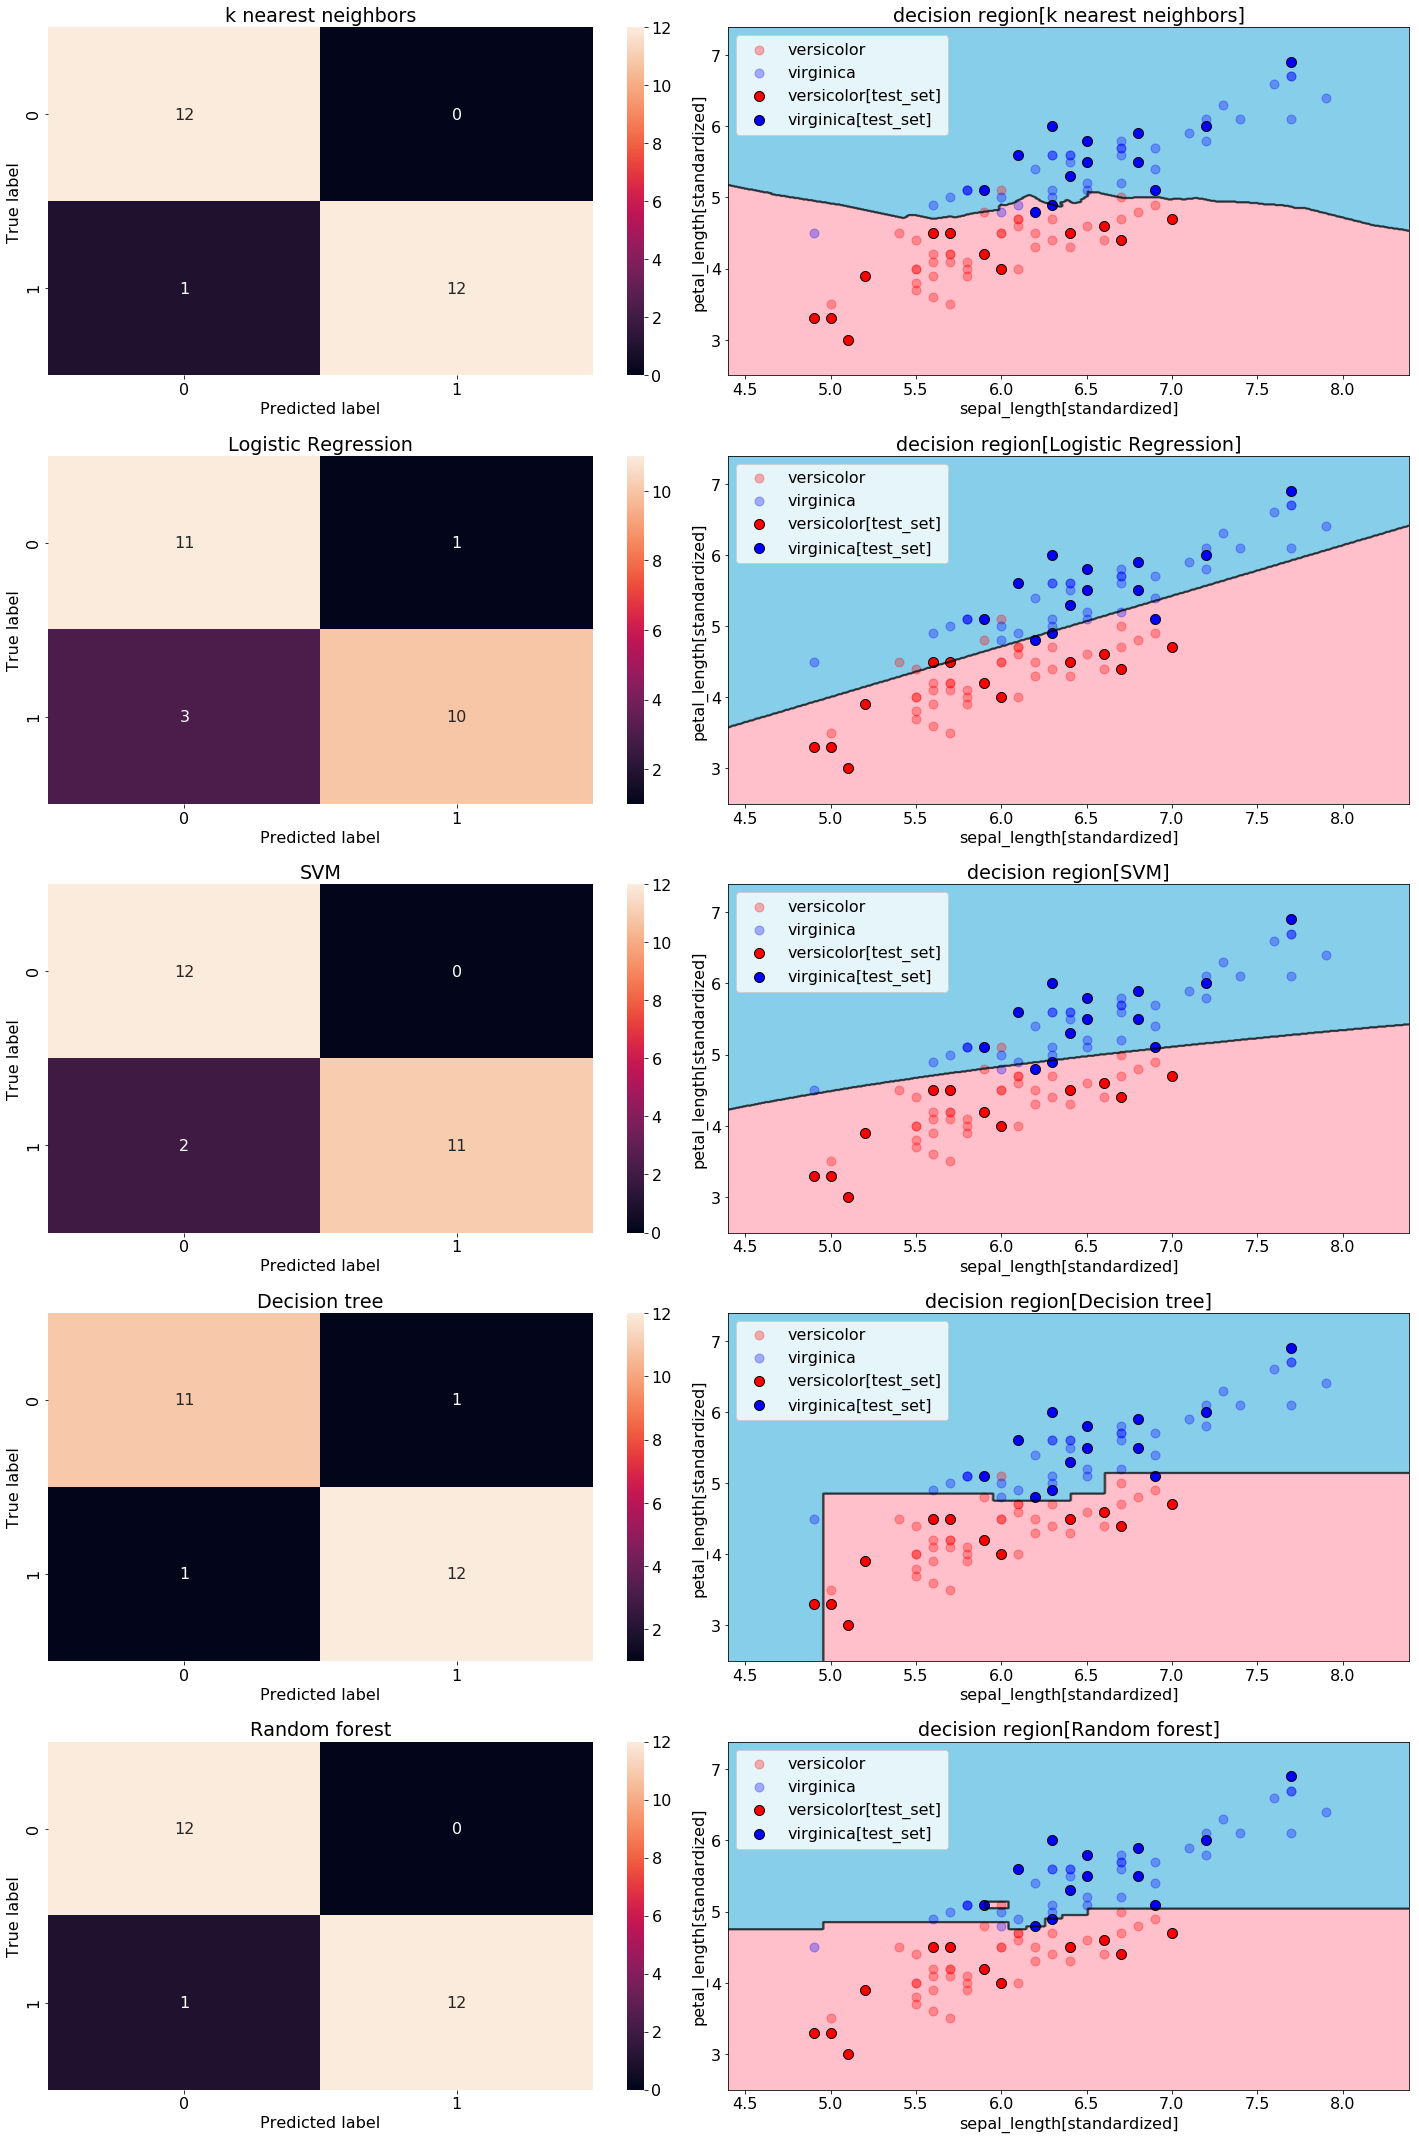

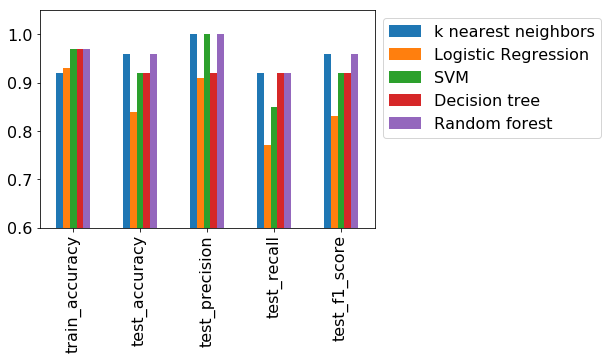

In [220]:
# 前項と同様の、modelsのパラメータ値に設定する
model_names = ["k nearest neighbors", "Logistic Regression", "SVM", "Decision tree", "Random forest"]
models = [knc(n_neighbors=12, p=2, metric="minkowski"), 
          lr(penalty="l2", C=1, random_state=1), 
          svc(C=10, kernel="rbf", gamma=0.1, random_state=1), 
          dtc(criterion="entropy", max_depth=5, random_state=1), 
          rfc(criterion="gini", max_depth=5, random_state=1, n_estimators=10)]
feature_names=["sepal_length[standardized]", "petal_length[standardized]"]
target_names=['versicolor', 'virginica']
test_idx=range(75,100)

# 標準化されていないX_train, X_testを使い、実際に関数実行
scoring_func(X_train, X_test, y_train, y_test, 
             model_names, models, feature_names, target_names, test_idx)
plt.show()

**結果**  
決定領域のプロットで、平均・分散が生データのままであることがわかる。特にLogisticRegressionのテスト精度が下がっている。特に勾配降下法では、各更新時のパラメータの更新幅に偏りが生じ、最適解を見つけるまでに時間がかかったり、最終的な真の最適解まで到達しないなどの不具合が生じる。

## 10. （アドバンス課題）全ての目的変数を使用して精度が高い手法
ここまではアヤメの種類を減らし2値分類を行ってきたが、3種類全てを使った多値分類を行う。学習と推定、評価を行って、最も精度の高い手法を探す。
ロジスティック回帰やSVMは2値分類を基本とした手法で、多値分類には工夫が必要だが、scikit-learnでは意識せず動作させることができる。しかし、**指標値precision、recall、f値はライブラリのパラメータをデフォルトから変更する**必要がある。マイクロ平均やマクロ平均という考え方を使うので、これについて調査して説明をまとめる。また、決定領域を可視化する場合は可視化用の関数を適切に書き換える必要がある。

,train_accuracy,test_accuracy,test_precision,test_recall,test_f1_score
k nearest neighbors,0.95,0.91,0.93,0.91,0.91
Logistic Regression,0.95,0.96,0.96,0.96,0.96
SVM,0.95,0.96,0.96,0.96,0.96
Decision tree,0.97,0.96,0.96,0.96,0.96
Random forest,0.97,0.93,0.94,0.93,0.93


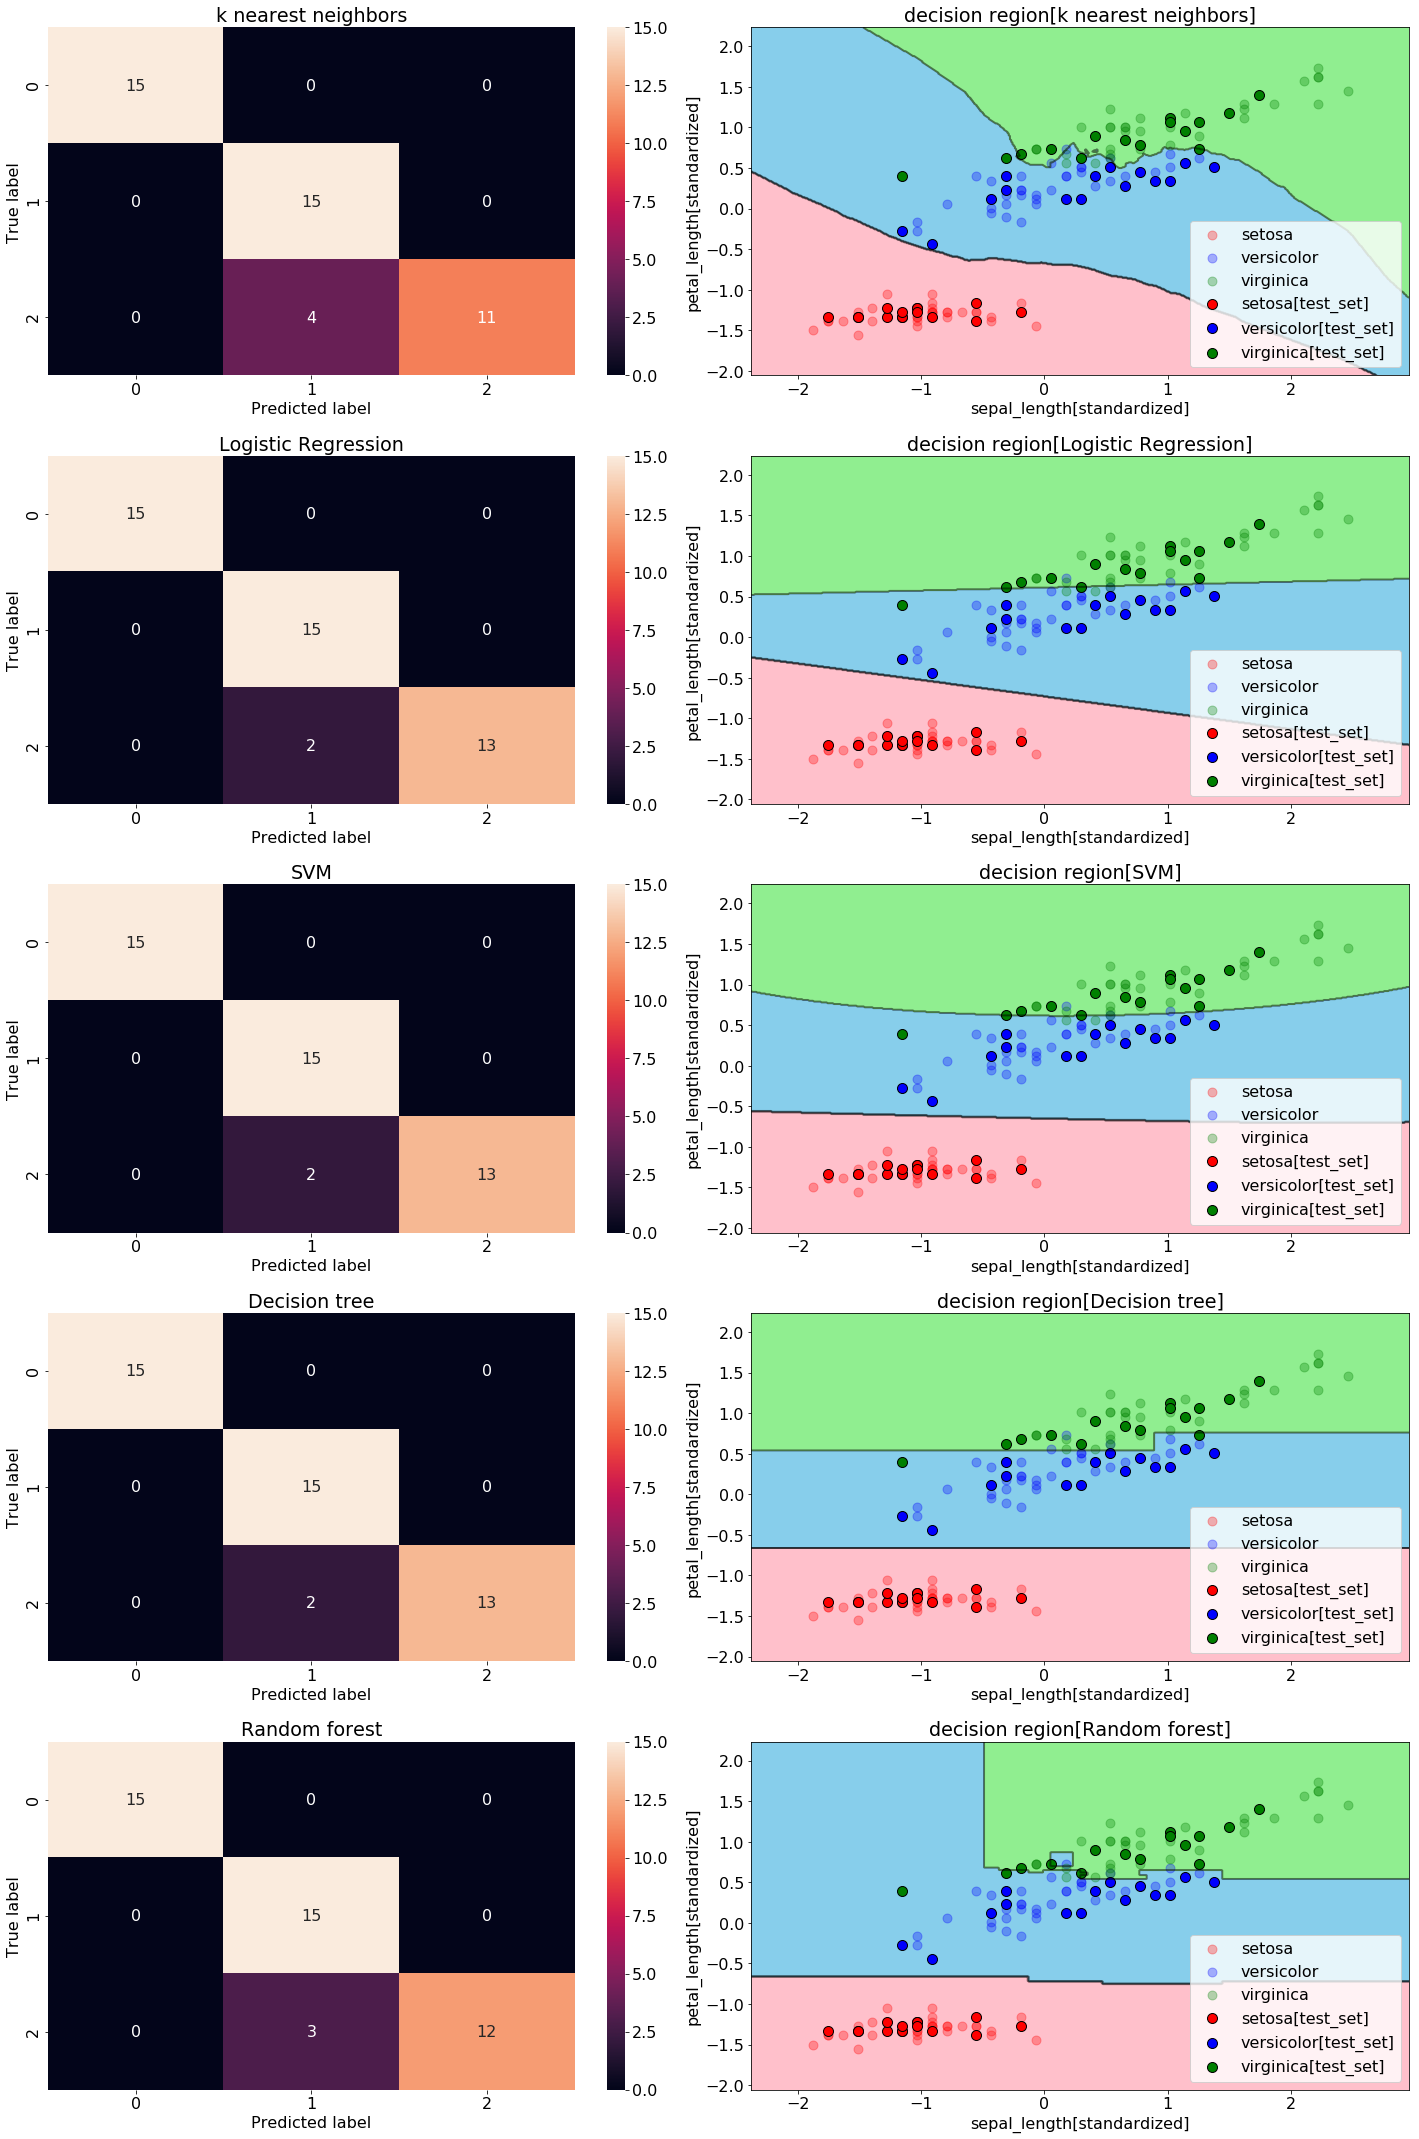

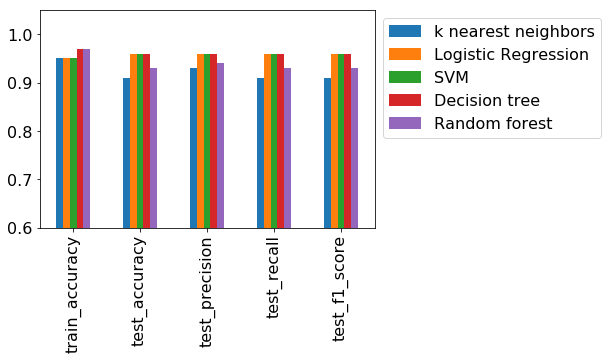

In [221]:
# 多値分類用のデータを作成（特徴量は2種類のまま）
X = iris.data[:, [0,2]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 前項と比べ、k近傍法とLogisticRegressionのパラメータ値をバリアンス上昇方向へ調整する
model_names = ["k nearest neighbors", "Logistic Regression", "SVM", "Decision tree", "Random forest"]
models = [knc(n_neighbors=8, p=2, metric="minkowski"), 
          lr(penalty="l2", C=10, solver="lbfgs", multi_class="multinomial", random_state=1), 
          svc(C=10, kernel="rbf", gamma=0.1, random_state=1), 
          dtc(criterion="entropy", max_depth=5, random_state=1), 
          rfc(criterion="gini", max_depth=5, random_state=1, n_estimators=10)]
feature_names=["sepal_length[standardized]", "petal_length[standardized]"]
target_names=['setosa', 'versicolor', 'virginica'] # 3種類に変更
test_idx=range(105,150) # test_size=0.3に合わせて変更

# precision, recall, f1の各スコア計算時の平均法を指定
def scoring_func(X_train, X_test, y_train, y_test, 
                 model_names, models, feature_names, target_names, test_idx):
    """
    多値分類（3種まで）を2次元の特徴量において複数のモデルで学習し、以下の図表を出力する。
    1. 訓練データの正解率、テストデータの正解率、適合率、再現率、f1スコアの5種の集計表
    2. 混同行列と決定領域を列ごとに、それらをモデル別に行ごとにまとめた図
    3. 1.の集計表の棒グラフ
    なお、決定領域の出力には別途作成したdecision_region関数を利用する。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    X_test : ndarray, shape(n_samples, 2)
        検証用データの特徴量
    y_train : ndarray, shape(m_samples,)
        学習用データの正解値
    y_test : ndarray, shape(m_samples,)
        検証用データの正解値
    model_names : list of str
        グラフタイトルに組み込むmodel名の一覧
    models : list of instances
        学習するモデルのインスンタスの一覧
    feature_names : list of str
        軸ラベルの一覧
    target_names= : list of str
        凡例の一覧
    test_idx : range of int
        テストデータのindex
    """
    score = []
    scoring_names = ["train_accuracy", "test_accuracy", "test_precision", "test_recall", "test_f1_score"]
    plt.figure(figsize=(20,30))
    plt.rcParams["font.size"] = 16
    subplot_iterator = iter(np.arange(1,len(models)*2+1)) # subplotのためのイテレータを作成(今回は5行2列の10要素) 
    # 学習、推定、評価リストを作成し、model毎に混同行列と決定境界を可視化
    for model_name, model in zip(model_names, models):
        # 学習
        model.fit(X_train, y_train)
        # 推定
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        # 評価
        score.append(accuracy_score(y_train, y_train_pred)) # 訓練データの正解率を算出
        score.append(accuracy_score(y_test, y_test_pred)) # テストデータの正解率を算出
        score.append(precision_score(y_test, y_test_pred, average="macro")) # テストデータの適合率を算出（平均法を指定）
        score.append(recall_score(y_test, y_test_pred, average="macro")) # テストデータの再現率を算出（平均法を指定）
        score.append(f1_score(y_test, y_test_pred, average="macro")) # テストデータのf1スコアを算出（平均法を指定）
        # subplotsの1列目に混同行列を可視化（ラベル0がversicolor、ラベル1がvirginica）
        plt.subplot(5,2,next(subplot_iterator))
        conf_mat = confusion_matrix(y_test, y_test_pred)
        sns.heatmap(conf_mat, annot=True)
        plt.title(model_name)
        plt.xlabel("Predicted label")
        plt.ylabel("True label")
        # subplotsの2列目に決定境界を可視化（model変数にはmodelを指定）
        plt.subplot(5,2,next(subplot_iterator))
        X_combined = np.vstack((X_train, X_test))
        y_combined = np.hstack((y_train, y_test))
        decision_region(X=X_combined, y=y_combined, model=model, step=0.01, test_idx=test_idx, 
                        feature_names=feature_names, target_names=target_names, 
                        model_name=model_name)
        plt.tight_layout()
    # 評価したスコアを集計して表示
    score = np.array(score).reshape(-1,5).round(2) # 各列を5種のスコアに変形
    score = pd.DataFrame(score, index=model_names, columns=scoring_names)
    display(score) # スコアのDataFrameを表示
    score.T.plot(kind="bar") # スコア毎に棒グラフを表示
    plt.legend(bbox_to_anchor=(1,1))
    plt.ylim(0.6,1.05)

# 実際に関数実行
scoring_func(X_train_std, X_test_std, y_train, y_test, 
             model_names, models, feature_names, target_names, test_idx)
plt.show()

**結果**  
　前項までと同様のパラメータ条件とした場合、k近傍法とLogisticRegressionが学習不足に陥った。そこで、バリアンスを上げるため、k近傍法のk値を8に下げた。また、LogisticRegressionには以下3点の変更を加えた。
- C=10に上げた
- solver="lbfgs"を新たに設定
- multi_class="multinomial"を新たに設定  

　C値の上昇により、モデルがより個々のデータに強く影響されるようにすることで、訓練データ学習がより反映される結果となった。また、L-BFGS（準ニュートン法）の多項分布に設定し直すことで、多値分類により適したモデルとなった。
 なお、今回の多値分類の適合率、再現率、f1スコアの平均法にはマクロ平均を用いている。
 例えば、2クラス問題での適合率は次式で求められる。

$$PRE=\frac{TP}{TP+FP}$$

 これより、$n$クラス問題での適合率のマイクロ平均は以下の式で求められる。
 
$$PRE_{micro}=\frac{\sum_{i=1}^{n}TP_i}{\sum_{i=1}^{n}TP_i+\sum_{i=1}^{n}FP_i}$$
　$n$クラス問題での適合率のマクロ平均は以下の式で求められる。
$$PRE_{macro}=\frac{\sum_{i=1}^{n}PRE_i}{n}$$

　マイクロ平均は全てのクラスの判別が終わってから最後に計算する式となっている。各予測を平等に重み付けしているので、この場合は真陽性や偽陽性が他のクラスと比べて極端に多いクラスの場合、そのクラスの影響が支配的となることがある。マクロ平均は各クラスのスコアの平均として平等に重み付けしている。今回は両者にほぼ違いは現れず、デフォルトのマクロ平均を用いて計算した。